In [3]:
# Let's prepare the data for testing and validation in models

from constants import target_name, x_path, y_path, preprocessed_data
from libs.simple_processing import separate_target, normalize
import pandas as pd

# data = pd.read_csv(preprocessed_data, usecols=[3], engine='python')
data = pd.read_csv(preprocessed_data, engine='python')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609124 entries, 0 to 1609123
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   month_number   1609124 non-null  int64
 1   shop_id        1609124 non-null  int64
 2   item_id        1609124 non-null  int64
 3   monthly_sales  1609124 non-null  int64
dtypes: int64(4)
memory usage: 49.1 MB


    month_number  monthly_sales
0              0             26
1              1             21
2              2             30
3              3             25
4              4             18
5              5             27
6              6             23
7              7             24
8              8             29
9              9             33
10            10             27
11            11             41
12            12             21
13            13             21
14            14             26
15            15             15
16            16             20
17            17             16
18            18             17
19            19             26
20            20             24
21            21             29
22            22             42
23            23             79
24            24             73
25            25             11
26            26             11
27            27             76
28            28              2
29            29              3
30      

KeyError: 1

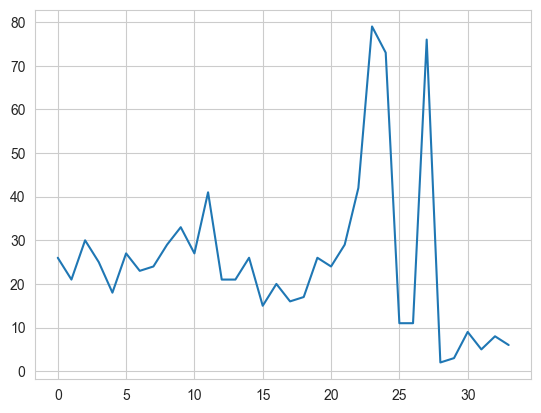

In [4]:

# Looks like the shop id is much better option - it is used almost 100K times
# Let's validate by drawing a global sales history for that shop

from pandas import DataFrame
import matplotlib.pyplot as plt

df = data.copy()

df['date'] = pd.to_datetime(df['date'], format="%d.%M.%Y")
df = df.set_index('date')
df = df.rename(columns={"item_cnt_day": "sales_number"})

sales = df.groupby(['date'], as_index=False)['sales_number'].sum()
sales['sales_number'] = sales['sales_number'].astype(int)

# sales.describe()

# df = df.drop(columns=['shop_id', 'item_id', 'item_price', 'date_block_num'])
df = df.drop(columns=['shop_id', 'item_id', 'item_price', 'date_block_num'])

df

# selected = monthly_sales.query('item_id==5822')
# by_shop = data.query(f'shop_id=={shop_id} and item_id=={item_id}')
by_shop = data.copy()
sales_shop = by_shop.groupby(['month_number'], as_index=False)['monthly_sales'].sum()

print(sales_shop)

fig, ax = plt.subplots()
ax.plot(sales_shop.month_number, sales_shop.monthly_sales)
plt.plot(sales_shop[1])

In [5]:
import numpy as np

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    # print(dataset)
    dataX, dataY = [], []
    for curri in range(len(dataset)-look_back-1):
        nexti = curri + look_back
        # print(nexti)
        dataX.append(dataset[curri: nexti])
        dataY.append(dataset[nexti: nexti + 1])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
X, y = create_dataset(sales_shop.monthly_sales, look_back)

print('X: ', X, 'y: ', y)


X:  [[26]
 [21]
 [30]
 [25]
 [18]
 [27]
 [23]
 [24]
 [29]
 [33]
 [27]
 [41]
 [21]
 [21]
 [26]
 [15]
 [20]
 [16]
 [17]
 [26]
 [24]
 [29]
 [42]
 [79]
 [73]
 [11]
 [11]
 [76]
 [ 2]
 [ 3]
 [ 9]
 [ 5]] y:  [[21]
 [30]
 [25]
 [18]
 [27]
 [23]
 [24]
 [29]
 [33]
 [27]
 [41]
 [21]
 [21]
 [26]
 [15]
 [20]
 [16]
 [17]
 [26]
 [24]
 [29]
 [42]
 [79]
 [73]
 [11]
 [11]
 [76]
 [ 2]
 [ 3]
 [ 9]
 [ 5]
 [ 8]]


In [6]:

# reshape input to be: [samples, time steps, features]
# .reshape(X, (rows, cols
print(X.shape)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
print(X.shape)
print(X)

(32, 1)
(32, 1, 1)
[[[26]]

 [[21]]

 [[30]]

 [[25]]

 [[18]]

 [[27]]

 [[23]]

 [[24]]

 [[29]]

 [[33]]

 [[27]]

 [[41]]

 [[21]]

 [[21]]

 [[26]]

 [[15]]

 [[20]]

 [[16]]

 [[17]]

 [[26]]

 [[24]]

 [[29]]

 [[42]]

 [[79]]

 [[73]]

 [[11]]

 [[11]]

 [[76]]

 [[ 2]]

 [[ 3]]

 [[ 9]]

 [[ 5]]]


In [7]:
print(y.shape)
y = np.reshape(y, (y.shape[0], 1, y.shape[1]))
print(y.shape)

(32, 1)
(32, 1, 1)


32/32 [==============================] - 0s 11ms/step - loss: 10.2099 - mean_absolute_error: 10.2099
Epoch 981/2000
32/32 [==============================] - 0s 11ms/step - loss: 10.2291 - mean_absolute_error: 10.2291
Epoch 982/2000
32/32 [==============================] - 0s 8ms/step - loss: 10.2204 - mean_absolute_error: 10.2204
Epoch 983/2000
32/32 [==============================] - 0s 8ms/step - loss: 10.2275 - mean_absolute_error: 10.2275
Epoch 984/2000
32/32 [==============================] - 0s 8ms/step - loss: 10.2197 - mean_absolute_error: 10.2197
Epoch 985/2000
32/32 [==============================] - 0s 8ms/step - loss: 10.2083 - mean_absolute_error: 10.2083
Epoch 986/2000
32/32 [==============================] - 0s 8ms/step - loss: 10.2134 - mean_absolute_error: 10.2134
Epoch 987/2000
32/32 [==============================] - 0s 8ms/step - loss: 10.2058 - mean_absolute_error: 10.2058
Epoch 988/2000
32/32 [==============================] - 0s 8ms/step - loss: 10.1987 - mean_ab

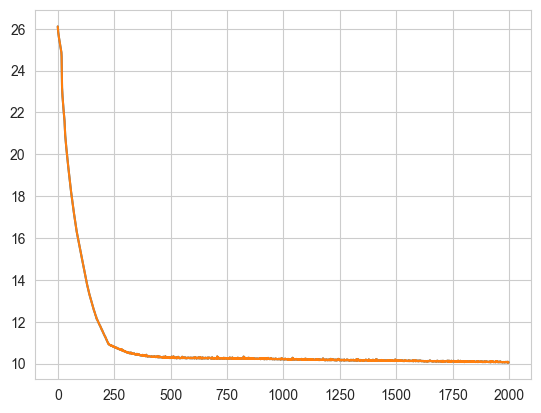

In [8]:
import tensorflow as tf
from libs.simple_plotter import plot_history

X_train = X.copy()
y_train = y.copy()

# features_count = X_train.shape[0]

early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.005,    # minimium amount of change to count as an improvement
    patience=7,         # how many epochs to wait before stopping
    restore_best_weights=True
)

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(4, input_shape=(1, look_back)))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam()
              , loss=tf.keras.losses.MeanAbsoluteError()
              , metrics=tf.metrics.MeanAbsoluteError())

history = model.fit(X_train, y_train
                    , epochs=1500
                    , callbacks=[early_stopping]
                    , batch_size = 1
                    , use_multiprocessing=True)

# print(history.history)
plot_history(history)


In [9]:
last_month = [[6]]
pred = model.predict(last_month) # sales from last month
print(pred)


2023-01-09 14:08:10.668409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 669ms/step
[[7.945962]]


2023-01-09 14:08:11.052914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 39ms/step


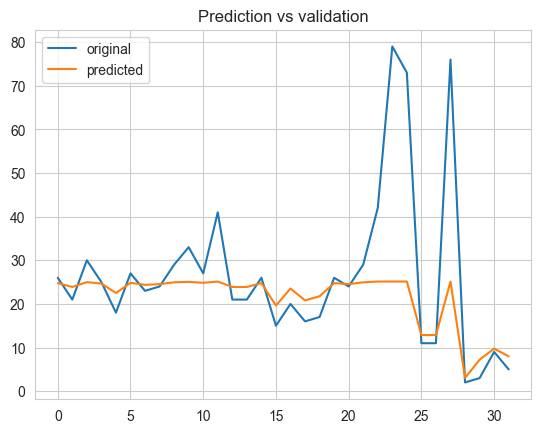

<Figure size 4000x1500 with 0 Axes>

In [13]:
y_pred = model.predict(X_train)

scale = range(len(y_pred))
plt.plot(scale, sales_shop.monthly_sales[:len(y_pred)], label="original")
plt.plot(scale, y_pred, label="predicted")
plt.title("Prediction vs validation")
plt.legend()
fig = plt.figure(figsize=(40, 15))
